In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
X = X[:, :2]

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

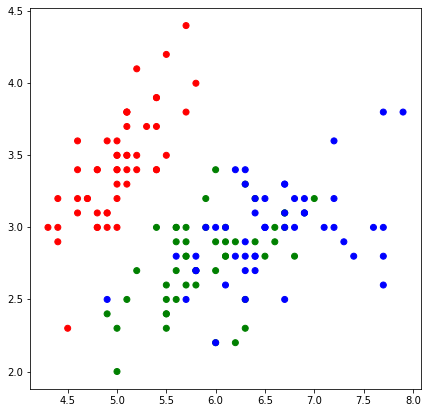

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [6]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [20]:
#mode = 0 обычный режим, mode = 1 режим от номера соседа, mode = 2 режим от расстояния
def knn(x_train, y_train, x_test, k, mode = 0, q = 1):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        counter = 1
        for d in sorted(test_distances)[0:k]:
            
            if mode == 0:
                classes[d[1]] += 1
            elif mode == 1:
                classes[d[1]] += 1*q**counter
            elif mode == 2:
                classes[d[1]] += 1*q**d[0]
            counter += 1
                
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
            
    return answers

In [21]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [19]:
k = 5

y_pred = knn(X_train, y_train, X_test, k, mode = 1, q = 0.5)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(y_pred)

Точность алгоритма при k = 5: 0.667
[0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1]


In [22]:
k = 5

y_pred = knn(X_train, y_train, X_test, k, mode = 2, q = 0.5)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(y_pred)

Точность алгоритма при k = 5: 0.867
[0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2]


In [25]:
def get_graph(X_train, y_train, k, mode = 0, q = 1):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, mode , q)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [34]:
def make_knn(X_train, y_train, k, mode = 0, q = 1):
    get_graph(X_train, y_train, k)
    y_pred = knn(X_train, y_train, X_test, k, mode, q)
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


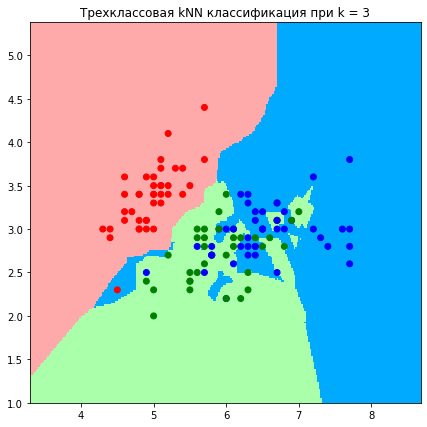

Точность алгоритма при k = 3: 0.733


In [38]:
make_knn(X_train, y_train, k = 3)

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


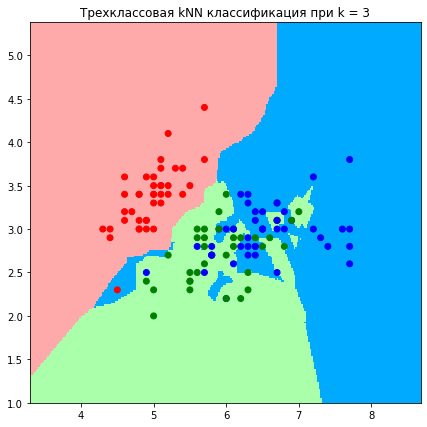

Точность алгоритма при k = 3: 0.667


In [39]:
make_knn(X_train, y_train, k = 3, mode = 1, q = 0.5)

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


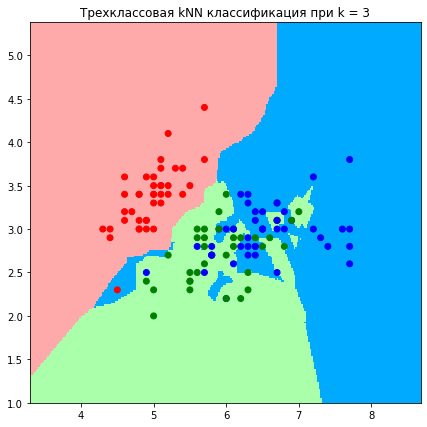

Точность алгоритма при k = 3: 0.733


In [40]:
make_knn(X_train, y_train, k = 3, mode = 2, q = 0.5)

In [41]:
#Метрика качесчтва для режима добавления весов для соседей в зависимости от номера соседа оказалась ниже чем метрика качества в случае
#расстояния до соседа.
#При этом сложность разделяющей гиперплоскости практически оказалась идентичной
#Существенным влиянием изменение способа добавления веса оказалось именно на точность алгоритма.
#То есть расстояние до соседа является более привлекательным способом взвешивания при классификации

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


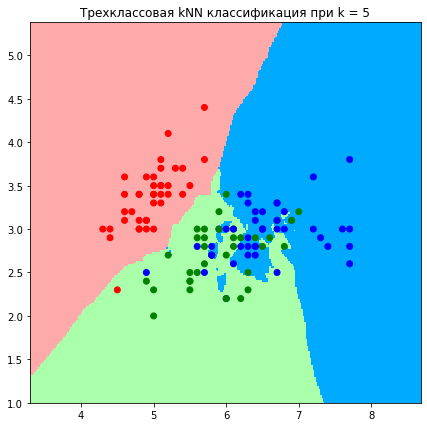

Точность алгоритма при k = 5: 0.667


In [44]:
make_knn(X_train, y_train, k = 5, mode = 1, q = 0.5)

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


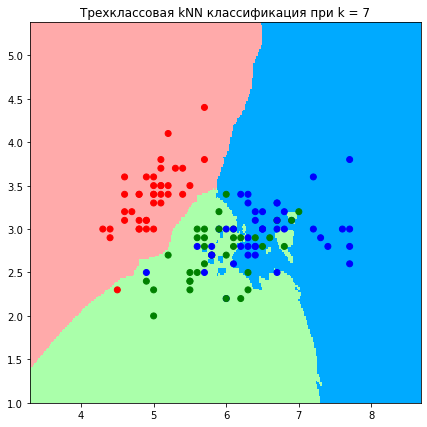

Точность алгоритма при k = 7: 0.667


In [45]:
make_knn(X_train, y_train, k = 7, mode = 1, q = 0.5)

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


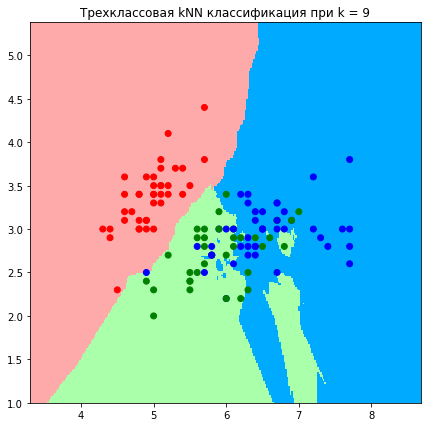

Точность алгоритма при k = 9: 0.667


In [46]:
make_knn(X_train, y_train, k = 9, mode = 1, q = 0.5)

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


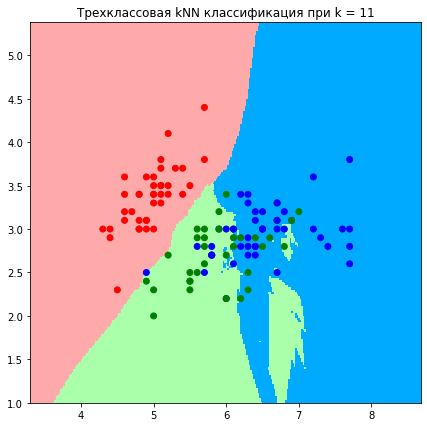

Точность алгоритма при k = 11: 0.667


In [50]:
make_knn(X_train, y_train, k = 11, mode = 1, q = 0.5)

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


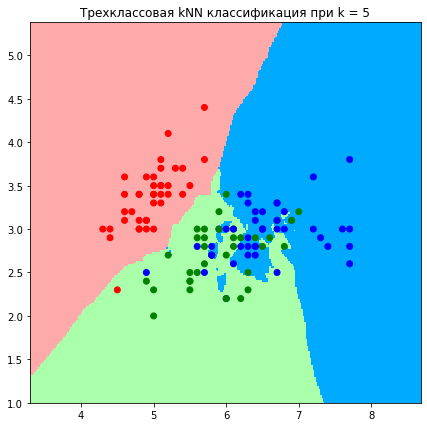

Точность алгоритма при k = 5: 0.867


In [47]:
make_knn(X_train, y_train, k = 5, mode = 2, q = 0.5)

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


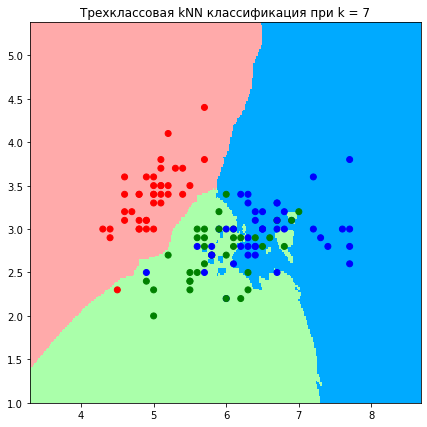

Точность алгоритма при k = 7: 0.800


In [48]:
make_knn(X_train, y_train, k = 7, mode = 2, q = 0.5)

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


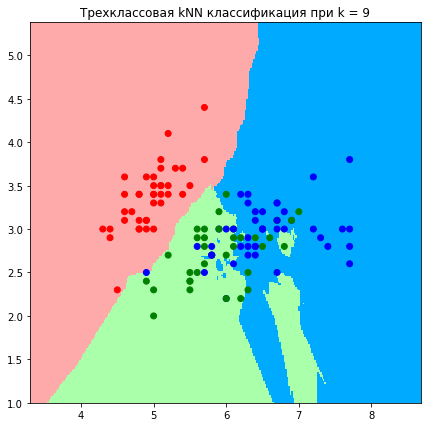

Точность алгоритма при k = 9: 0.867


In [49]:
make_knn(X_train, y_train, k = 9, mode = 2, q = 0.5)

<ipython-input-25-02f81665768d>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


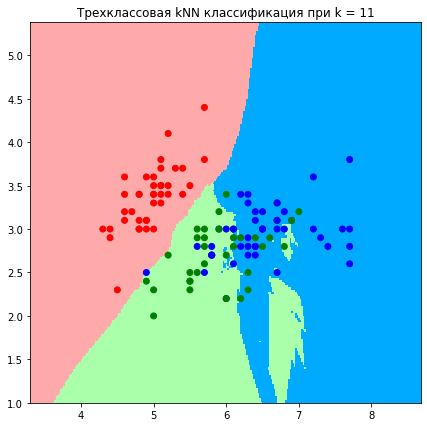

Точность алгоритма при k = 11: 0.833


In [51]:
make_knn(X_train, y_train, k = 11, mode = 2, q = 0.5)

In [ ]:
#Для алгоритма из п.1 оптимальным можно выбрать значение числа соседей k = 7. 
#Для алгоритма из п.2 оптимальным можно выбрать значение числа соседей k = 5
#C ростом числа соседей происходит вначале рост, а затем снижение точности